<div align="center" style="display: flex; justify-content: space-between;">
  <div style="flex: 1; padding: 10px;">
    <a href="https://github.com/encord-team/text-to-image-eval/actions?query=workflow%3ATests" target="_blank" style="text-decoration:none"><img src="https://github.com/encord-team/text-to-image-eval/actions/workflows/tests.yml/badge.svg?branch=main"></a>
    <a href="https://www.python.org/downloads/release/python-3119/" target="_blank" style="text-decoration:none"><img src="https://img.shields.io/badge/python-3.11%2B-blue" alt="Python Versions"></a>
    <a target="_blank" style="text-decoration:none"><img alt="PRs Welcome" src="https://img.shields.io/badge/PRs-Welcome-blue"></a>
    <img alt="License" src="https://img.shields.io/github/license/encord-team/text-to-image-eval">
  </div>
  <div style="flex: 1; padding: 10px;">
    <a href="https://github.com/encord-team/encord-notebooks" target="_blank" style="text-decoration:none"><img alt="Encord Notebooks" src="https://img.shields.io/badge/Encord_Notebooks-blue?logo=github&label=&labelColor=181717"></a>
    <a href="https://join.slack.com/t/encordactive/shared_invite/zt-1hc2vqur9-Fzj1EEAHoqu91sZ0CX0A7Q" target="_blank" style="text-decoration:none"><img alt="Join us on Slack" src="https://img.shields.io/badge/Join_Our_Community-4A154B?label=&logo=slack&logoColor=white"></a>
    <a href="https://twitter.com/encord_team" target="_blank" style="text-decoration:none"><img alt="Twitter Follow" src="https://img.shields.io/twitter/follow/encord_team?label=%40encord_team&amp;style=social"></a>
  </div>
</div>

<h1 align="center">
    <img src="https://storage.googleapis.com/docs-media.encord.com/static/img/text-to-image-eval/tti-eval-banner-short.png" alt="tti-eval logo banner">
</h1>

# 📝 tti-eval | 🗄️ Bring Your Own Dataset From Encord Quickstart

Welcome to the *Bring Your Own Dataset From Encord Quickstart* guide for the `tti-eval` tool.
This notebook covers how to bring a dataset from Encord to `tti-eval`.

In this notebook, you will explore:
- How to find the required information of the dataset on the Encord website.
- Generating and registering the new dataset definition.
- ⭐ Start using your dataset right away.

## Overview

`tti-eval` is a repository for benchmarking text-to-image models **on your own data**!

With this library, you can take an embedding model intended for jointly embedding images and text (like [CLIP](https://huggingface.co/openai/clip-vit-large-patch14-336)) and compute metrics for how well such model performs on classifying your custom dataset.

🟡 Prior to continuing, note that the notebook may restart the runtime the first time you run it after installing Python 3.11. This restart is necessary as switching Python versions in Colab requires a runtime restart.

> Learn more about 📝 `tti-eval`:
> - [🖥️ CLI Quickstart](https://colab.research.google.com/drive/1SsKre_9vQ9SAIQyPFQmbUBXRKzoZv8AH?usp=sharing)
> - [🐍 Python Quickstart](https://colab.research.google.com/drive/1DNn5uH6rss8I4BZG4-Y0rayRkRwYXwMu?usp=sharing)
> - [🤖 Bring Your Own Model From Hugging Face Quickstart](https://colab.research.google.com/drive/1ZuhBJ5QtH3MKuO-Y5QiiEKoz4BU1Un-8?usp=sharing)
> - [GitHub repository](https://github.com/encord-team/text-to-image-eval)

## Set up the repo and dependencies

In [ ]:
#@title 1. Install and set up Python 3.11 {display-mode: "form"}
# Credits to JanEricNitschke in https://github.com/pnxenopoulos/awpy/issues/248#issuecomment-1575170156

#The code below installs 3.11 (assuming you now have 3.10) and restarts environment, so you can run your cells.
import sys #for version checker
import os #for restart routine

if '3.11' in sys.version:
  print('You already have 3.11, nothing to install')
elif '3.10' in sys.version:
  print("Python version is: ", sys.version)

  print("Printing content of /usr/local/lib/python* to see available versions")
  !ls /usr/local/lib/python*

  #install python 3.11 and dev utils
  #you may not need all the dev libraries, but I haven't tested which aren't necessary.
  !sudo apt-get update -y > /dev/null
  !sudo apt-get install python3.11 python3.11-dev python3.11-distutils libpython3.11-dev > /dev/null
  !sudo apt-get install python3.11-venv binfmt-support  > /dev/null #recommended in install logs of the command above

  #change alternatives
  !sudo update-alternatives --install /usr/bin/python3 python3 /usr/bin/python3.10 1 > /dev/null
  !sudo update-alternatives --install /usr/bin/python3 python3 /usr/bin/python3.11 2 > /dev/null

  # install pip
  !curl -sS https://bootstrap.pypa.io/get-pip.py | python3.11  > /dev/null

  #install colab's dependencies
  !python3 -m pip install ipython==7.9.0 traitlets==5.7.1 jupyter psutil matplotlib setuptools ipython_genutils ipykernel jupyter_console notebook prompt_toolkit httplib2 astor  > /dev/null

  #minor cleanup
  !sudo apt autoremove > /dev/null

  #link to the old google package
  !ln -s /usr/local/lib/python3.10/dist-packages/google /usr/local/lib/python3.11/dist-packages/google > /dev/null

  #this is just to verify if 3.11 folder was indeed created
  print("Printing content of /usr/local/lib/python3.11/")
  !ls /usr/local/lib/python3.11/

  #restart environment so you don't have to do it manually
  os.kill(os.getpid(), 9)
else:
  print("Your out of the box Python is not 3.10, so probably the script will not work, so pls feel free to edit the script to ignore then check and re-run: ", sys.version)

You already have 3.11, nothing to install


In [ ]:
#@title 2. Clone the repo
!git clone https://github.com/encord-team/text-to-image-eval.git

Cloning into 'text-to-image-eval'...
remote: Enumerating objects: 813, done.
remote: Counting objects: 100% (395/395), done.
remote: Compressing objects: 100% (238/238), done.
remote: Total 813 (delta 258), reused 189 (delta 156), pack-reused 418
Receiving objects: 100% (813/813), 2.02 MiB | 16.40 MiB/s, done.
Resolving deltas: 100% (413/413), done.


In [ ]:
#@title 3. Install repo dependencies
%cd /content/text-to-image-eval/
!pip install poetry
!poetry config virtualenvs.in-project true # Configure Poetry to create virtual environments in the project folder
!poetry add ipykernel # Resolve Colab specific missing dependency
!poetry install --no-ansi

sys.path.insert(0, '/content/text-to-image-eval/.venv/lib/python3.11/site-packages')

## Bring your dataset from Encord

Encord provides a Dataset abstraction that includes only the raw data, without any annotations. To access both the data and labels, you will need to get a Project, which holds the annotations made on the dataset with a specific Ontology, that houses the declaration of the object and classification classes.

To register a Dataset from Encord, you will require the hash of the project and the hash of the multiclass classification (referred to as radio button classification within Encord) you intend to utilize moving forward. With this information, store the dataset definition as a JSON file in the `sources/datasets/` folder at the root of the repository, adhering to this structure:

```json
{
  "dataset_type": "EncordDataset",
  "title": "<title-in-tti-eval>",
  "project_hash": "<target-project-hash>",
  "classification_hash": "<target-classification-hash>"
}
```

### 1. Find the hash of the Encord Project

Open the [Encord app](https://app.encord.com/) and navigate to the target project. The project hash is located below the project title. Please refer to the image for visual guidance.

![project-hash-location](https://storage.googleapis.com/docs-media.encord.com/static/img/text-to-image-eval/project-hash-location-encord.png)

In [ ]:
#@markdown Overwrite the project hash with the actual hash
project_hash = "273fb578-6f20-429d-92c6-06a5f5ba5664"

### 2. Find the classification hash within the Ontology

To view the associated Ontology of the current project, navigate to 'Settings > Ontology settings > Edit Ontology'. In the 'Ontology preview' section, ensure the 'Display JSON' toggle is enabled. You will find the hash of the target classification there. Please refer to the image for visual guidance.

![classification-hash-location](https://storage.googleapis.com/docs-media.encord.com/static/img/text-to-image-eval/classification-hash-location-encord.png)

In [ ]:
#@markdown Overwrite the classification hash with the actual hash
classification_hash = "9rFHnsr5"

### 3. Register the dataset to `tti-eval`

 With the project hash and classification hash at hand, let's include the dataset definition as a JSON file in the `sources/datasets/` folder at the root of the repository, adhering to this structure:

```json
{
  "dataset_type": "EncordDataset",
  "title": "<title-in-tti-eval>",
  "project_hash": "<target-project-hash>",
  "classification_hash": "<target-classification-hash>"
}
```

In [ ]:
import json
from pathlib import Path

dataset_definition = {
  "dataset_type": "EncordDataset",
  "title": "my-dataset",
  "project_hash": project_hash,
  "classification_hash": classification_hash,
}

Path('./sources/datasets/my-dataset.json').write_text(json.dumps(dataset_definition, indent=2), encoding="utf-8")

Your dataset has now been permanently incorporated into `tti-eval` and is ready to be utilized for any future tasks.

> Please note that any dataset operation requires an SSH key associated with an Encord user holding admin privileges for the relevant Encord Project. You can specify the SSH key location directly in the dataset by including the additional field `ssh_key_path` in the dataset definition. In the absence of this field, `tti-eval` will default to using the global `ENCORD_SSH_KEY_PATH` environment variable.

### [EXTRA] Test the dataset availability

In [ ]:
#@title Simple test to check that the dataset is available in the CLI
!poetry run tti-eval list --all

Available datasets are: Alzheimer-MRI, chest-xray-classification, LungCancer4Types, my-dataset, plants, rsicd, skin-cancer, sports-classification
Available models are: apple, bioclip, clip, eva-clip, fashion, plip, pubmed, rsicd, rsicd-encord, siglip_large, siglip_small, street, tinyclip, vit-b-32-laion2b


In [ ]:
#@markdown Adding the SSH key and its path to an environment variable.
#@markdown Required to download and update the dataset.
import getpass

# Prompt the user to input the value of the SSH key
env_value = getpass.getpass("Enter the value of the SSH Key: ")

key_path = Path('sample_ssh_key')
key_path.write_text(env_value, encoding="utf-8")
%env ENCORD_SSH_KEY_PATH={key_path.resolve()}

Enter the value of the SSH Key: ··········
env: ENCORD_SSH_KEY_PATH=/content/text-to-image-eval/sample_ssh_key


In [ ]:
#@title Let's use Python to determine the size of the dataset
from tti_eval.dataset import DatasetProvider, Split

my_dataset = DatasetProvider.get_dataset("my-dataset", split=Split.ALL)
len(my_dataset)

6

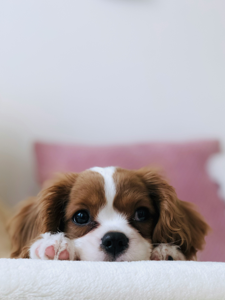

'dog'

In [ ]:
#@title Let's display a sample
sample = my_dataset[-1]
image = sample["image"]
image.thumbnail((300,300)) # Scale the image, so it doesn't occupy all the screen
display(image)
my_dataset.class_names[sample["label"]]

In [ ]:
#@title Advanced test to build the embeddings of the dataset data
#@markdown It's commented as it can take some time and is slower on a CPU configuration.

#!poetry run tti-eval build --model-dataset clip/my-dataset

## Wrap Up

This notebook has provided an introduction to bringing a dataset from Encord to `tti-eval`, showcasing how to find the relevant project and classification hashes, register the dataset definition in `tti-eval`, and start using it right away.

---

🟣 `tti-eval` is an open-source repository for benchmarking text-to-image models **on your own data**!
**Check out the project on [GitHub](https://github.com/encord-team/text-to-image-eval) and leave a star 🌟** if you like it.
Contributions are welcome!
Please feel free to open an issue or submit a pull request with your suggestions, bug fixes, or new features.

---

👉 Check out the 📖 [Encord Blog](https://encord.com/blog/) and 📺 [YouTube](https://www.youtube.com/@encord) channel to stay up-to-date with the latest in computer vision, foundation models, active learning, and data-centric AI.
